# Used Cars Dataset 

## Phase 0: Imports and Reading Data

In [3]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Set the number of columns to 14
pd.set_option('display.max_columns', 14)

In [4]:
cars = pd.read_csv('used_cars.csv')

# Set the target column to be the last one
cars = cars.reindex(columns = [col for col in cars.columns if col != 'Price'] + ['Price'])


## Phase 1: Data exploration

### 1.1: General exploration

In [5]:
cars.shape

(46022, 14)

In [6]:
cars.head()

,Id,Company Name,Model Name,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status,Price
0,0,Toyota,Vitz,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered,2385000
1,1,Toyota,Corolla,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered,111000
2,2,Suzuki,Alto,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered,1530000
3,3,Suzuki,Alto,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered,1650000
4,4,Toyota,Corolla,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered,1435000


In [7]:
cars.describe()

,Id,Model Year,Mileage,Engine Capacity,Price
count,46022.000000,46022.000000,46022.000000,46022.000000,4.602200e+04
mean,23010.526205,2011.035374,90965.128243,1313.115575,2.014153e+06
std,13285.595581,6.399403,63656.656034,614.690832,2.939071e+06
min,0.000000,1990.000000,1.000000,16.000000,1.110000e+05
25%,11505.250000,2007.000000,48899.500000,1000.000000,8.500000e+05
50%,23010.500000,2013.000000,80000.000000,1300.000000,1.450000e+06
75%,34515.750000,2016.000000,120000.000000,1500.000000,2.300000e+06
max,46022.000000,2019.000000,999999.000000,6600.000000,7.750000e+07


### 1.2: Detailed exploration

Text(0, 0.5, 'Count')

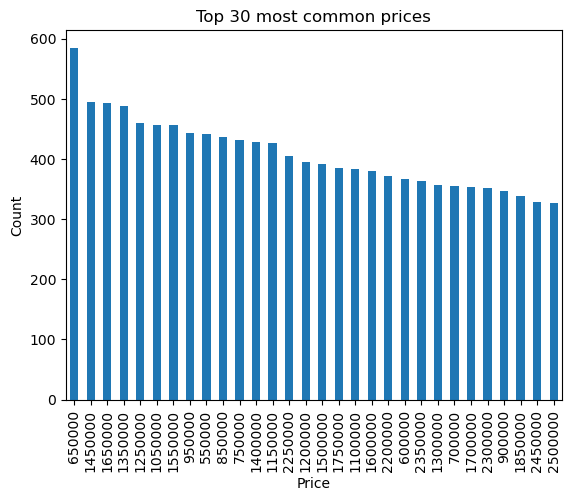

In [10]:
graf = cars['Price'].value_counts().head(30).plot(kind='bar', title="Top 30 most common prices")
graf.set_ylabel('Count')

Text(0.5, 0, 'Price')

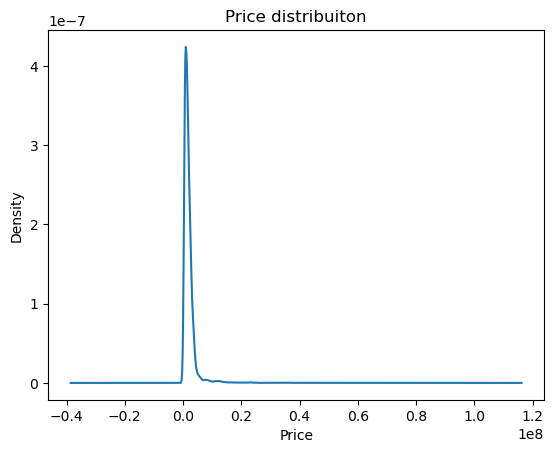

In [12]:
graf = cars['Price'].plot(kind='kde', title='Price distribuiton')
graf.set_xlabel('Price')

#### Relation: 'Company Name' with 'Price'

In [31]:
cars.groupby(by=['Company Name'])['Price'].mean()

Company Name
Adam          2.100000e+05
Audi          8.582803e+06
BMW           5.858343e+06
Chery         5.337500e+05
Chevrolet     6.716250e+05
DFSK          2.029444e+06
Daewoo        3.140625e+05
Daihatsu      1.170548e+06
FAW           1.016508e+06
Fiat          3.550000e+05
Honda         2.144228e+06
Hummer        1.500000e+07
Hyundai       6.217972e+05
Jaguar        1.400000e+07
Jeep          4.516667e+06
KIA           2.026790e+06
Land          3.007500e+06
Lexus         1.364086e+07
MINI          3.570000e+06
Mazda         1.360242e+06
Mercedes      5.253756e+06
Mitsubishi    1.260086e+06
Nissan        1.604033e+06
Porsche       1.875000e+07
Range         1.425879e+07
SsangYong     1.642692e+06
Subaru        1.267224e+06
Suzuki        9.020341e+05
Toyota        2.995425e+06
United        8.597031e+05
Volvo         1.275000e+06
Name: Price, dtype: float64

#### Relation: 'Company Name' and 'Model Name' with 'Price'

In [32]:
cars.groupby(by=['Company Name', 'Model Name'])['Price'].mean()

Company Name  Model Name
Adam          Revo          2.100000e+05
Audi          A3            5.861667e+06
              A4            6.761074e+06
              A5            1.120233e+07
              A6            1.129659e+07
                                ...     
Toyota        Voxy          4.033333e+06
              Wish          2.110769e+06
              iQ            1.446667e+06
United        Bravo         8.597031e+05
Volvo         S40           1.275000e+06
Name: Price, Length: 197, dtype: float64

#### Relation: 'Color' with 'Price'

In [33]:
cars.groupby(by=['Color'])['Price'].mean()

Color
Assembly     2.245749e+06
Beige        1.443181e+06
Black        2.978100e+06
Blue         1.356260e+06
Bronze       2.168867e+06
Brown        2.238717e+06
Burgundy     2.181375e+06
Gold         1.203126e+06
Green        1.280708e+06
Grey         1.449484e+06
Indigo       1.715553e+06
Magenta      1.400000e+06
Maroon       1.439175e+06
Navy         1.920408e+06
Orange       2.006875e+06
Pink         1.331665e+06
Purple       2.003667e+06
Red          1.569943e+06
Silver       1.721924e+06
Turquoise    1.346222e+06
Unlisted     2.707817e+06
White        2.197988e+06
Wine         1.190000e+06
Yellow       1.334398e+06
Name: Price, dtype: float64

#### Relation: 'Assembly' with 'Price'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


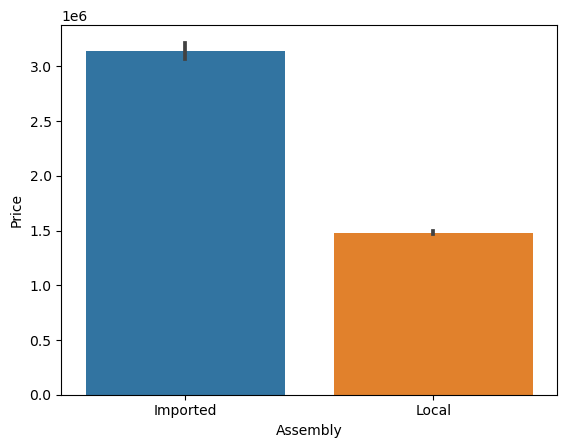

In [30]:
sns.barplot(x='Assembly', y='Price', data=cars)
plt.show()

#### Relation: 'Engine Capacity' with 'Price'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


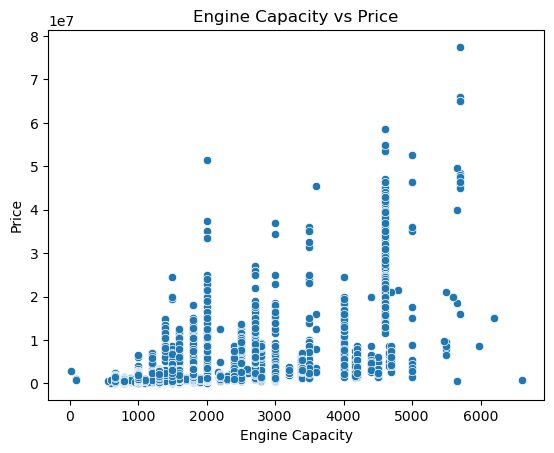

In [14]:
graf = sns.scatterplot(x='Engine Capacity', y='Price', data=cars)
graf.set_title('Engine Capacity vs Price')
plt.show()

#### Relation: 'Engine Capacity' and 'Engine Type' with 'Price'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

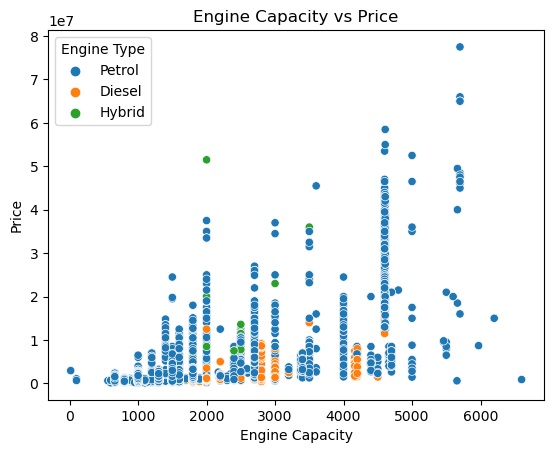

In [15]:
graf = sns.scatterplot(x='Engine Capacity', y='Price', hue='Engine Type', data=cars)
graf.set_title('Engine Capacity vs Price')
plt.show()

#### Relation: 'Mileage' with 'Price'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


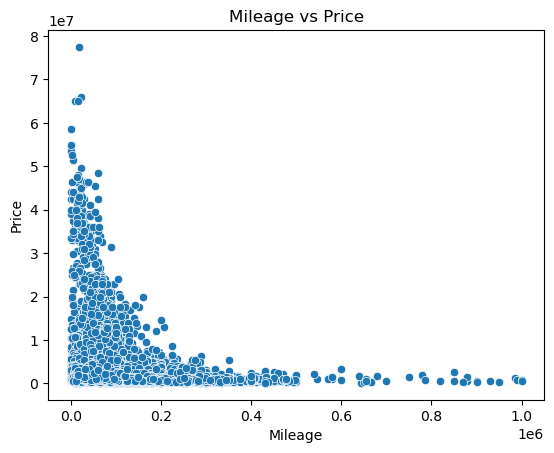

In [17]:
graf = sns.scatterplot(x='Mileage', y='Price', data=cars)
graf.set_title('Mileage vs Price')
plt.show()

#### Relation: 'Model Year' with 'Price'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


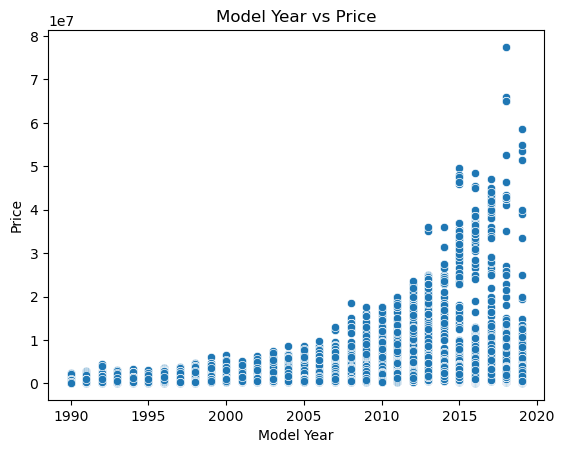

In [19]:
graf = sns.scatterplot(x='Model Year', y='Price', data=cars)
graf.set_title('Model Year vs Price')
plt.show()

#### Correlation Matrix

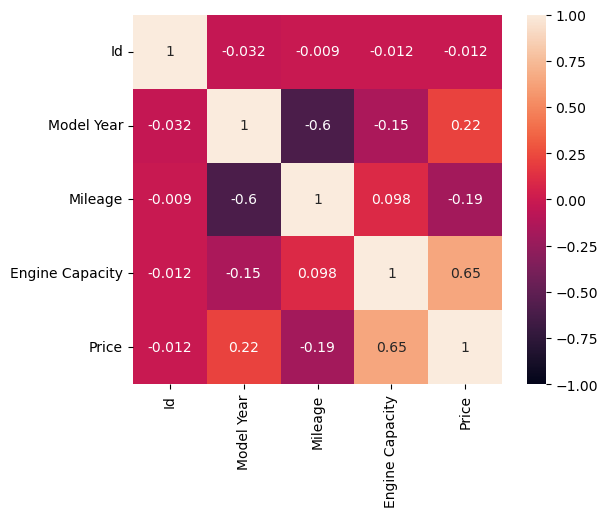

In [18]:
corr_matrix = cars.corr(numeric_only=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

## Phase 2: Data preparation

## Phase 3: Model training and evaluation